#data loading

In [6]:
import pandas as pd
data =pd.read_csv("/content/tweets_analysis.csv",encoding="latin-1")

# Exploratory data analysis

In [7]:
data.columns

Index(['0', '1467810369', 'Mon Apr 06 22:19:45 PDT 2009', 'NO_QUERY',
       '_TheSpecialOne_',
       '@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D'],
      dtype='object')

**Renaming the require columns**

In [8]:
data.columns.values[0]="target"
data.columns.values [5]="tweet"


In [9]:
data.columns

Index(['target', '1467810369', 'Mon Apr 06 22:19:45 PDT 2009', 'NO_QUERY',
       '_TheSpecialOne_', 'tweet'],
      dtype='object')

**used only required columns**

In [10]:
final_data =data.iloc[:,[0,-1]]

In [11]:
print(final_data)

      target                                              tweet
0          0  is upset that he can't update his Facebook by ...
1          0  @Kenichan I dived many times for the ball. Man...
2          0    my whole body feels itchy and like its on fire 
3          0  @nationwideclass no, it's not behaving at all....
4          0                      @Kwesidei not the whole crew 
...      ...                                                ...
7545       0  UPS trackers are really niffty. My phone is in...
7546       0        another long day today  is it friday yet??!
7547       0                  that hurt my feelings    *B-Unit*
7548       0  @kyndoll yo yo happy birthday! wish it was my ...
7549       0                                                NaN

[7550 rows x 2 columns]


In [ ]:
final_data.head()

,target,tweet
0,0,is upset that he can't update his Facebook by ...
1,0,@Kenichan I dived many times for the ball. Man...
2,0,my whole body feels itchy and like its on fire
3,0,"@nationwideclass no, it's not behaving at all...."
4,0,@Kwesidei not the whole crew


In [ ]:
final_data.tail()

,target,tweet
1048570,4,My GrandMa is making Dinenr with my Mum
1048571,4,Mid-morning snack time... A bowl of cheese noo...
1048572,4,@ShaDeLa same here say it like from the Termi...
1048573,4,@DestinyHope92 im great thaanks wbuu?
1048574,4,cant wait til her date this weekend


In [ ]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1048575 non-null  int64 
 1   tweet   1048575 non-null  object
dtypes: int64(1), object(1)
memory usage: 16.0+ MB


In [ ]:
final_data.describe

<bound method NDFrame.describe of          target                                              tweet
0             0  is upset that he can't update his Facebook by ...
1             0  @Kenichan I dived many times for the ball. Man...
2             0    my whole body feels itchy and like its on fire 
3             0  @nationwideclass no, it's not behaving at all....
4             0                      @Kwesidei not the whole crew 
...         ...                                                ...
1048570       4           My GrandMa is making Dinenr with my Mum 
1048571       4  Mid-morning snack time... A bowl of cheese noo...
1048572       4  @ShaDeLa same here  say it like from the Termi...
1048573       4             @DestinyHope92 im great thaanks  wbuu?
1048574       4               cant wait til her date this weekend 

[1048575 rows x 2 columns]>

In [ ]:
summary_stat =final_data.describe(include='all')
print(summary_stat)

              target                      tweet
count   1.048575e+06                    1048575
unique           NaN                    1036135
top              NaN  isPlayer Has Died! Sorry 
freq             NaN                        210
mean    9.482431e-01                        NaN
std     1.701120e+00                        NaN
min     0.000000e+00                        NaN
25%     0.000000e+00                        NaN
50%     0.000000e+00                        NaN
75%     0.000000e+00                        NaN
max     4.000000e+00                        NaN


**Delete the empty rows**

In [12]:
final_data.dropna()

,target,tweet
0,0,is upset that he can't update his Facebook by ...
1,0,@Kenichan I dived many times for the ball. Man...
2,0,my whole body feels itchy and like its on fire
3,0,"@nationwideclass no, it's not behaving at all...."
4,0,@Kwesidei not the whole crew
...,...,...
7544,0,Www.fmylife.com wow sometimes this site is fun...
7545,0,UPS trackers are really niffty. My phone is in...
7546,0,another long day today is it friday yet??!
7547,0,that hurt my feelings *B-Unit*


**No empty row present in our data**

In [13]:
final_data.isnull()

,target,tweet
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
7545,False,False
7546,False,False
7547,False,False
7548,False,False


# Data cleaning

In [14]:
import re

In [15]:
def clean_text(text):
  if isinstance(text,str):
    text=text.lower()
    text=re.sub(r'http\S+|www.\S+', '', text)
    text=re.sub(r'@\w+', '', text)
    text=re.sub(r'[^a-z\s]', '', text)
    return text.strip()
  else:
    return text

In [16]:
final_data["tweet"] =final_data['tweet'].apply(clean_text)

<ipython-input-16-d828a8582199>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data["tweet"] =final_data['tweet'].apply(clean_text)


In [17]:
final_data.tail()

,target,tweet
7545,0,ups trackers are really niffty my phone is in ...
7546,0,another long day today is it friday yet
7547,0,that hurt my feelings bunit
7548,0,yo yo happy birthday wish it was my birthday i...
7549,0,NaN


**downloading only tweet columns**

In [18]:

# Extract only the "tweets" column (replace 'tweet_text' with the actual column name in your file)
final_data = final_data[["tweet"]]  # Use the correct column name from your dataset

# Save it as a new CSV file
final_data.to_csv("tweet_only.csv", index=False)

print("CSV file with only tweets saved successfully!")


CSV file with only tweets saved successfully!


# install important libraries

In [1]:
!pip install transformers torch


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 22.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 18.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 18.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 996.5 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 23.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

In [19]:
!pip install transformers torch pandas tqdm


**load the data set only tweet**

In [36]:
import pandas as pd

# Load your CSV file (replace 'tweets_only.csv' with your actual filename)
tweet_data = pd.read_csv("/content/tweet_only.csv")

# Display first few rows
print(tweet_data.head())



                                               tweet
0  is upset that he cant update his facebook by t...
1  i dived many times for the ball managed to sav...
2     my whole body feels itchy and like its on fire
3  no its not behaving at all im mad why am i her...
4                                 not the whole crew


In [24]:
tweet_data.columns

Index(['tweet'], dtype='object')

In [25]:
from transformers import pipeline

# Load the sentiment analysis model (optimized for tweets)
sentiment_model = pipeline("sentiment-analysis", model="cardiffnlp/twitter-roberta-base-sentiment")


config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

Device set to use cpu


In [28]:
# Ensure all tweets are strings and fill missing values with an empty string
tweet_data["tweet"] = tweet_data["tweet"].astype(str).fillna("")


# training the modal to our data set

In [29]:
from tqdm import tqdm

# Map model labels to human-readable labels
labels_map = {0: "NEGATIVE", 1: "NEUTRAL", 2: "POSITIVE"}

# Apply sentiment analysis
tqdm.pandas()
tweet_data["sentiment"] = tweet_data["tweet"].progress_apply(lambda text: labels_map[int(sentiment_model(text)[0]['label'].split('_')[-1])])

# Save results to a new CSV file
tweet_data.to_csv("tweets_with_sentiment.csv", index=False)

print("Sentiment analysis completed and saved!")


100%|██████████| 7550/7550 [16:48<00:00,  7.49it/s]

Sentiment analysis completed and saved!


**train modal gives sentiment according to the tweet**

In [32]:
tweet_data.tail(100)

,tweet,sentiment
7450,i have no followers,NEGATIVE
7451,now has a hurty wrist and a hurty eye falling...,NEGATIVE
7452,biolife class choreographing some recital ro...,POSITIVE
7453,lahore essexeating only been to lahore,NEUTRAL
7454,i can see it now i was having similar issues l...,NEGATIVE
...,...,...
7545,ups trackers are really niffty my phone is in ...,NEUTRAL
7546,another long day today is it friday yet,NEUTRAL
7547,that hurt my feelings bunit,NEGATIVE
7548,yo yo happy birthday wish it was my birthday i...,NEGATIVE


#interpretation of sentiment

In [33]:
# Count the number of tweets per sentiment
sentiment_counts = tweet_data["sentiment"].value_counts()
print(sentiment_counts)


sentiment
NEGATIVE    4142
NEUTRAL     2499
POSITIVE     909
Name: count, dtype: int64


**percentage of sentiment**

In [34]:
# Calculate percentage
total_tweets = len(tweet_data)
sentiment_percentages = (sentiment_counts / total_tweets) * 100

# Print results
print(sentiment_percentages)


sentiment
NEGATIVE    54.860927
NEUTRAL     33.099338
POSITIVE    12.039735
Name: count, dtype: float64


# visualisation of sentiment analysis

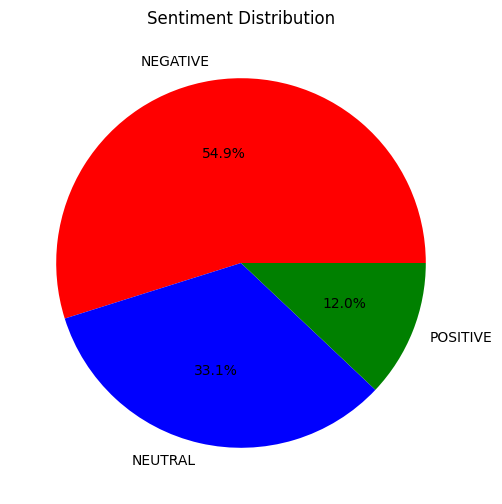

In [35]:
import matplotlib.pyplot as plt

# Plot sentiment distribution
plt.figure(figsize=(6, 6))
plt.pie(sentiment_percentages, labels=sentiment_percentages.index, autopct="%1.1f%%", colors=["red", "blue", "green"])
plt.title("Sentiment Distribution")
plt.show()


# Report of analysis:

**🔍 What This Means:**

1️⃣ **Majority of comments (54.86%)** are negative 😠

This indicates a lot of dissatisfaction or criticism in the comments.

**Possible causes:** complaints, negative experiences, controversial topic.

2️⃣ **33.10% of comments are neutral** 😐

People are making neutral or factual statements without strong emotions.

Could include questions, general discussions, or mixed opinions.

3️⃣ **Only 12.04% of comments are positive** 😊

Very few people are expressing appreciation or happiness.

Suggests low engagement from happy users or a controversial post.